In [1]:
from pickle import load
from numpy import argmax
from keras.preprocessing.sequence import pad_sequences
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from keras.models import load_model

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Using TensorFlow backend.


In [2]:
def extract_features(filename):
	# load the model
	model = VGG16()
	# re-structure the model
	model.layers.pop()
	model = Model(inputs=model.inputs, outputs=model.layers[-1].output)
	# load the photo
	image = load_img(filename, target_size=(224, 224))
	# convert the image pixels to a numpy array
	image = img_to_array(image)
	# reshape data for the model
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	# get features
	feature = model.predict(image, verbose=0)
	return feature

In [3]:
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

In [4]:
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq : -> '
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

In [19]:
!wget https://focus2move.com/wp-content/uploads/2018/05/Volkswagen-Tiguan_US-Version-2018.jpg -P Images/

--2018-10-05 01:13:00--  https://focus2move.com/wp-content/uploads/2018/05/Volkswagen-Tiguan_US-Version-2018.jpg
Resolving focus2move.com (focus2move.com)... 185.2.4.88
Connecting to focus2move.com (focus2move.com)|185.2.4.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314006 (307K) [image/jpeg]
Saving to: ‘Images/Volkswagen-Tiguan_US-Version-2018.jpg’

Volkswagen-Tiguan_U 100%[===================>] 306.65K   273KB/s    in 1.1s    

2018-10-05 01:13:02 (273 KB/s) - ‘Images/Volkswagen-Tiguan_US-Version-2018.jpg’ saved [314006/314006]



In [6]:
tokenizer = load(open('tokenizer.pkl', 'rb'))
# pre-define the max sequence length (from training)
max_length = 34
# load the model
model = load_model('models/model_8.h5')


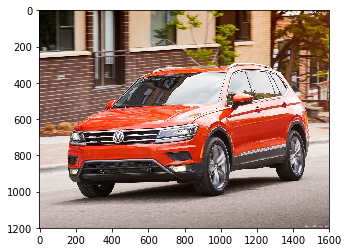

startseq : ->  man in red shirt is standing in front of the water endseq


In [20]:
# load and prepare the photograph
name = 'Images/Volks.jpg'
photo = extract_features(name)


img=mpimg.imread(name)
plt.imshow(img)
plt.show()

# generate description
description = generate_desc(model, tokenizer, photo, max_length)
print(description)